# Data Preparation


In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.preprocessing import LabelEncoder

In [77]:
df= pd.read_csv("adult.data.csv")

In [78]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [79]:
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [80]:
len(header)

15

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [82]:
df.columns = header

In [83]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [84]:
print(len(df))
print(df.isnull().sum())


32560
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [86]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [87]:
df['workclass'] = df['workclass'].astype('str')

df['workclass'] = df.workclass.replace(' ?', ' Unknown')

In [88]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Unknown              1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [89]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [90]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [91]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [92]:
df['occupation'] = df['occupation'].replace(' ?', ' Unknown')

In [93]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Unknown              1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [94]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [95]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [96]:
df['native-country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [97]:
# Replace all values in a column except for a single value
df['native-country'] = df['native-country'].mask(df['native-country'] != ' United-States', ' Other')

In [98]:
df['native-country'].value_counts()

 United-States    29169
 Other             3391
Name: native-country, dtype: int64

In [99]:
df['salary'].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [100]:
df= df.drop(['education'],axis=1)

# Categorical encoding

In [101]:
df1 = df.drop(['salary'], axis=1)

#categorical features
categorical = df1.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
print(categorical.columns.values)

#numerical features
numerical= df1.select_dtypes(include =[np.float64,np.int64])
print("\nNumerical Features in Train Set:",numerical.shape[1])
print(numerical.columns.values)

Categorical Features in Train Set: 7
['workclass' 'marital-status' 'occupation' 'relationship' 'race' 'sex'
 'native-country']

Numerical Features in Train Set: 6
['age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss'
 'hours-per-week']


C:\Users\v1\AppData\Local\Temp/ipykernel_16520/3019844302.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df1.select_dtypes(include =[np.object])


In [102]:
le = LabelEncoder()

var_mod = ['sex','native-country']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [103]:
df = pd.get_dummies(df, columns=['workclass','marital-status','occupation','relationship','race' ],drop_first= True)

df.head(2)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,workclass_ Local-gov,...,occupation_ Unknown,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,50,83311,13,1,0,0,13,1,<=50K,0,...,0,0,0,0,0,0,0,0,0,1
1,38,215646,9,1,0,0,40,1,<=50K,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
df['salary'] = le.fit_transform(df['salary'])

# Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x26a38cecd90>,
 'caps': [<matplotlib.lines.Line2D at 0x26a38d09430>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a38cecbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x26a38d09910>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a38d09be0>],
 'means': []}

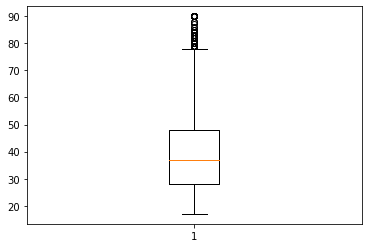

In [29]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26a38fb0e80>,
 'caps': [<matplotlib.lines.Line2D at 0x26a38fc0460>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a38fb0c10>],
 'medians': [<matplotlib.lines.Line2D at 0x26a38fc0a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a38fc0cd0>],
 'means': []}

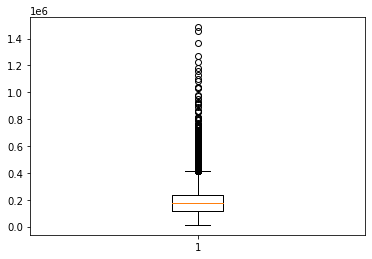

In [30]:
plt.boxplot(df['fnlwgt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26a3b49f160>,
 'caps': [<matplotlib.lines.Line2D at 0x26a3b49f5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a3b48fe80>],
 'medians': [<matplotlib.lines.Line2D at 0x26a3b49fb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a3b49fe80>],
 'means': []}

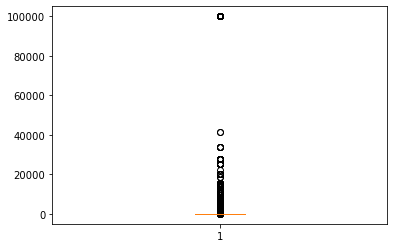

In [31]:
plt.boxplot(df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26a3b4eed60>,
 'caps': [<matplotlib.lines.Line2D at 0x26a3b500340>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a3b4eea90>],
 'medians': [<matplotlib.lines.Line2D at 0x26a3b5008e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a3b500bb0>],
 'means': []}

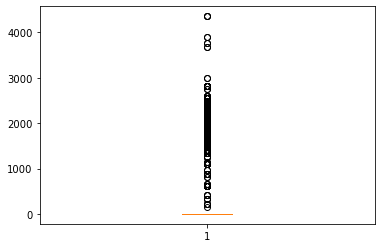

In [32]:
plt.boxplot(df['capital-loss'])

In [104]:
X= df.drop(columns = ['salary'], axis=1)
y= df['salary']
print(X.shape)
print(y.shape)

(32560, 45)
(32560,)


# Standarisation

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X, y)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(lda_var_ratios, 0.90)

1

# PCA

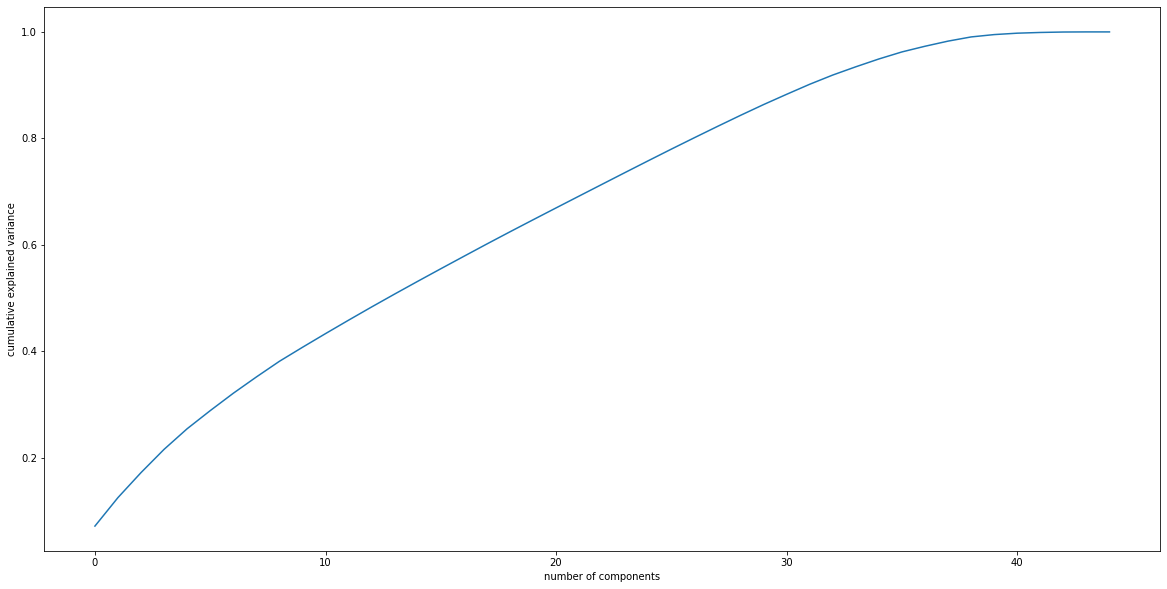

In [106]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

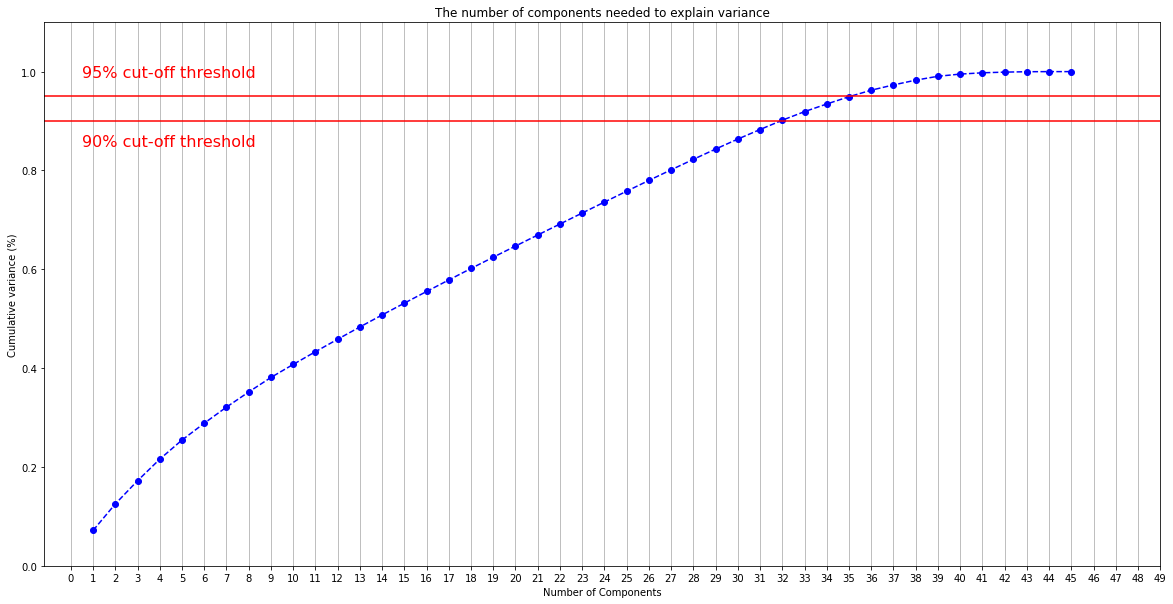

In [107]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
xi = np.arange(1, 46, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 50, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.99, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


#60 - 90%
#65 - 95%

In [39]:
#90%

pca = PCA(n_components=32)
X = pca.fit_transform(X)

# CLASS IMBALANCE 

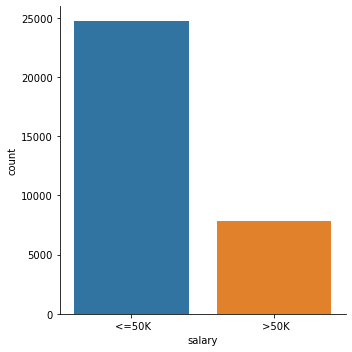

In [40]:
sns.catplot(x='salary',kind = 'count',data= df)

In [46]:
lessthan50 = df[df['salary']==" <=50K"]
greaterthan50 = df[df['salary']==" >50K"]

print(lessthan50.shape,greaterthan50.shape)

(24719, 46) (7841, 46)


In [55]:
X= df.drop(columns = ['salary'], axis=1)
y= df['salary']
X = sc.fit_transform(X)

In [56]:
### OVERSAMPLING

# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))

Counter({0: 24719, 1: 24719})


In [57]:
## UNDERSAMPLING

# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution
print(Counter(y_rus))

Counter({0: 7841, 1: 7841})


In [58]:
### Combined OVER AND UNDERSAMPLING

# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.9)


# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")


# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 24719, 1: 19775})
Combined Random Sampling: Counter({0: 21972, 1: 19775})


In [59]:
## SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

X_sm, y_sm = sm.fit_resample(X,y)
print(f"SMOTE Sampling: {Counter(y_sm)}")

SMOTE Sampling: Counter({0: 24719, 1: 24719})


In [60]:
## SMOTETomelek

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# pip install scikit-learn==0.23.1
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_smk,y_smk=smk.fit_resample(X,y)
print(f"SMOTETomek Sampling: {Counter(y_smk)}")

SMOTETomek Sampling: Counter({0: 24002, 1: 24002})


# ML MODELLING

In [61]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
import time


plt.rcParams["figure.figsize"] = (5,5)
def result(model):

    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n Oversampled Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n Undersampled Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n Combined Sampling Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n SMOTE Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")
    
    X_train, X_test, y_train, y_test = train_test_split(X_smk, y_smk, test_size=0.33, random_state=42)
    start = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("\n SMOTETomek Data\n",accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr,tpr)
    print('ROC AUC=%.3f' % (roc_auc))
    print("\nTime Taken :"+ str(end - start) +" seconds")


 Oversampled Data
 0.8170395341710083
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      8164
           1       0.82      0.82      0.82      8151

    accuracy                           0.82     16315
   macro avg       0.82      0.82      0.82     16315
weighted avg       0.82      0.82      0.82     16315

[[6657 1507]
 [1478 6673]]


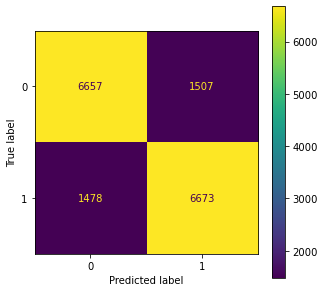

ROC AUC=0.896

Time Taken :11.420840978622437 seconds

 Undersampled Data
 0.7826506955177743
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2597
           1       0.81      0.74      0.77      2579

    accuracy                           0.78      5176
   macro avg       0.78      0.78      0.78      5176
weighted avg       0.78      0.78      0.78      5176

[[2147  450]
 [ 675 1904]]


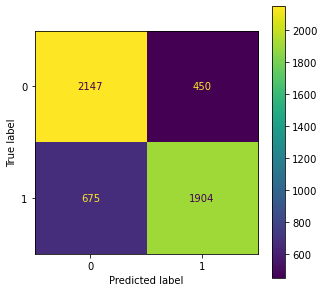

ROC AUC=0.864

Time Taken :1.4481422901153564 seconds

 Combined Sampling Data
 0.8121506859258184
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      7300
           1       0.80      0.79      0.80      6477

    accuracy                           0.81     13777
   macro avg       0.81      0.81      0.81     13777
weighted avg       0.81      0.81      0.81     13777

[[6055 1245]
 [1343 5134]]


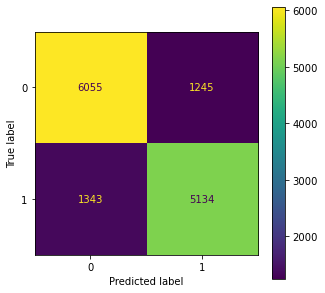

ROC AUC=0.892

Time Taken :8.688448190689087 seconds

 SMOTE Data
 0.8451118602513025
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      8164
           1       0.83      0.87      0.85      8151

    accuracy                           0.85     16315
   macro avg       0.85      0.85      0.85     16315
weighted avg       0.85      0.85      0.85     16315

[[6685 1479]
 [1048 7103]]


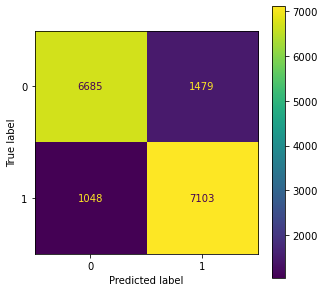

ROC AUC=0.914

Time Taken :11.592242240905762 seconds

 SMOTETomek Data
 0.8598030551698018
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7931
           1       0.84      0.89      0.86      7911

    accuracy                           0.86     15842
   macro avg       0.86      0.86      0.86     15842
weighted avg       0.86      0.86      0.86     15842

[[6558 1373]
 [ 848 7063]]


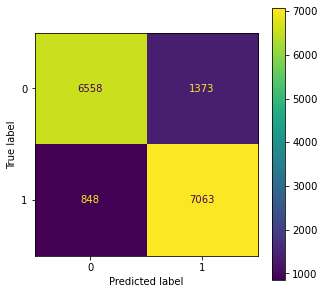

ROC AUC=0.924

Time Taken :11.868927240371704 seconds


In [62]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)

result(knn)


 Oversampled Data
 0.8194912657064052
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8164
           1       0.80      0.84      0.82      8151

    accuracy                           0.82     16315
   macro avg       0.82      0.82      0.82     16315
weighted avg       0.82      0.82      0.82     16315

[[6495 1669]
 [1276 6875]]


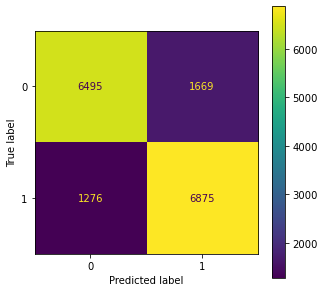

ROC AUC=0.907

Time Taken :0.30023956298828125 seconds

 Undersampled Data
 0.8245749613601236
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2597
           1       0.81      0.84      0.83      2579

    accuracy                           0.82      5176
   macro avg       0.82      0.82      0.82      5176
weighted avg       0.82      0.82      0.82      5176

[[2098  499]
 [ 409 2170]]


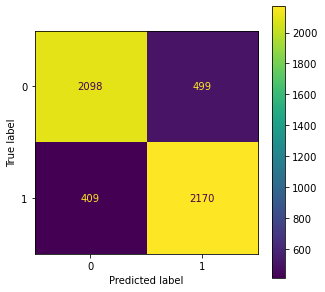

ROC AUC=0.905

Time Taken :0.08404541015625 seconds

 Combined Sampling Data
 0.8195543296799013
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7300
           1       0.80      0.82      0.81      6477

    accuracy                           0.82     13777
   macro avg       0.82      0.82      0.82     13777
weighted avg       0.82      0.82      0.82     13777

[[5951 1349]
 [1137 5340]]


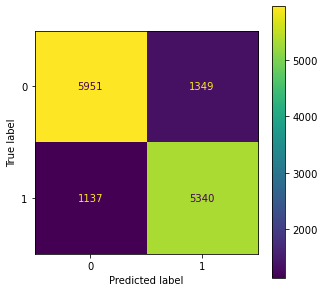

ROC AUC=0.907

Time Taken :0.23708057403564453 seconds

 SMOTE Data
 0.8257431811216672
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8164
           1       0.81      0.85      0.83      8151

    accuracy                           0.83     16315
   macro avg       0.83      0.83      0.83     16315
weighted avg       0.83      0.83      0.83     16315

[[6539 1625]
 [1218 6933]]


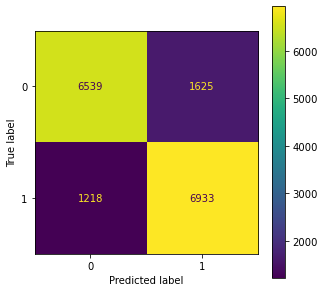

ROC AUC=0.911

Time Taken :0.3970911502838135 seconds

 SMOTETomek Data
 0.8337962378487564
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7931
           1       0.82      0.86      0.84      7911

    accuracy                           0.83     15842
   macro avg       0.83      0.83      0.83     15842
weighted avg       0.83      0.83      0.83     15842

[[6390 1541]
 [1092 6819]]


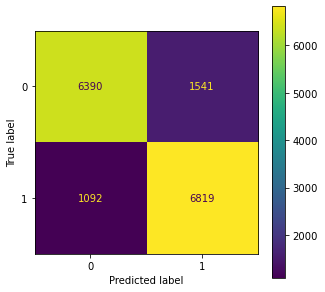

ROC AUC=0.914

Time Taken :0.27105212211608887 seconds


In [64]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
result(log)


 Oversampled Data
 0.6992951271835735
              precision    recall  f1-score   support

           0       0.92      0.44      0.59      8164
           1       0.63      0.96      0.76      8151

    accuracy                           0.70     16315
   macro avg       0.77      0.70      0.68     16315
weighted avg       0.77      0.70      0.68     16315

[[3576 4588]
 [ 318 7833]]


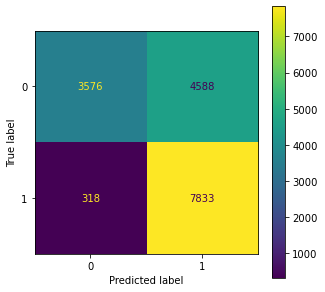

ROC AUC=0.863

Time Taken :0.04299449920654297 seconds

 Undersampled Data
 0.6814142194744977
              precision    recall  f1-score   support

           0       0.91      0.40      0.56      2597
           1       0.62      0.96      0.75      2579

    accuracy                           0.68      5176
   macro avg       0.76      0.68      0.65      5176
weighted avg       0.77      0.68      0.65      5176

[[1046 1551]
 [  98 2481]]


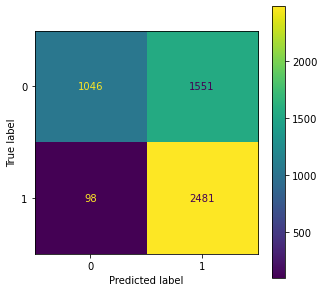

ROC AUC=0.815

Time Taken :0.01502680778503418 seconds

 Combined Sampling Data
 0.6842563693111708
              precision    recall  f1-score   support

           0       0.92      0.44      0.60      7300
           1       0.60      0.95      0.74      6477

    accuracy                           0.68     13777
   macro avg       0.76      0.70      0.67     13777
weighted avg       0.77      0.68      0.67     13777

[[3247 4053]
 [ 297 6180]]


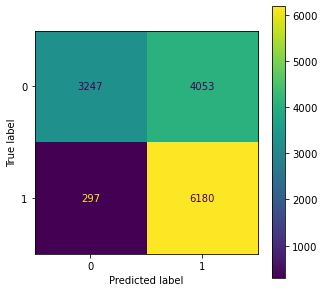

ROC AUC=0.862

Time Taken :0.035002708435058594 seconds

 SMOTE Data
 0.679252221881704
              precision    recall  f1-score   support

           0       0.95      0.38      0.54      8164
           1       0.61      0.98      0.75      8151

    accuracy                           0.68     16315
   macro avg       0.78      0.68      0.65     16315
weighted avg       0.78      0.68      0.65     16315

[[3110 5054]
 [ 179 7972]]


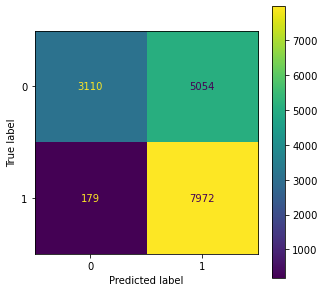

ROC AUC=0.821

Time Taken :0.04103350639343262 seconds

 SMOTETomek Data
 0.6909481126120439
              precision    recall  f1-score   support

           0       0.94      0.41      0.57      7931
           1       0.62      0.97      0.76      7911

    accuracy                           0.69     15842
   macro avg       0.78      0.69      0.66     15842
weighted avg       0.78      0.69      0.66     15842

[[3255 4676]
 [ 220 7691]]


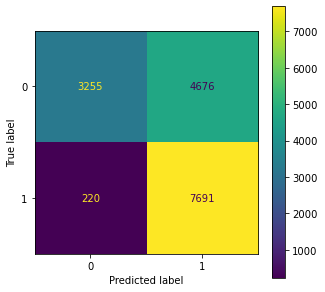

ROC AUC=0.827

Time Taken :0.04503607749938965 seconds


In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result(nb)


 Oversampled Data
 0.9202574318112167
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8164
           1       0.89      0.96      0.92      8151

    accuracy                           0.92     16315
   macro avg       0.92      0.92      0.92     16315
weighted avg       0.92      0.92      0.92     16315

[[7171  993]
 [ 308 7843]]


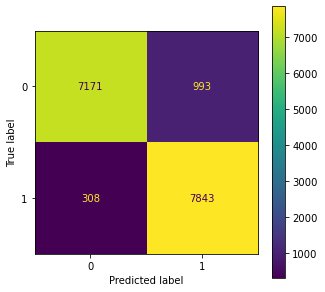

ROC AUC=0.979

Time Taken :4.191036939620972 seconds

 Undersampled Data
 0.8209041731066461
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2597
           1       0.81      0.84      0.82      2579

    accuracy                           0.82      5176
   macro avg       0.82      0.82      0.82      5176
weighted avg       0.82      0.82      0.82      5176

[[2091  506]
 [ 421 2158]]


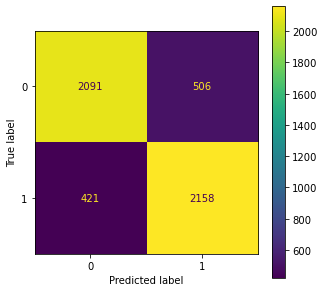

ROC AUC=0.908

Time Taken :1.3102891445159912 seconds

 Combined Sampling Data
 0.90680119038978
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7300
           1       0.87      0.94      0.91      6477

    accuracy                           0.91     13777
   macro avg       0.91      0.91      0.91     13777
weighted avg       0.91      0.91      0.91     13777

[[6375  925]
 [ 359 6118]]


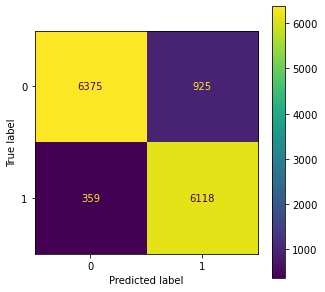

ROC AUC=0.971

Time Taken :3.4143550395965576 seconds

 SMOTE Data
 0.8939626110940851
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8164
           1       0.88      0.91      0.90      8151

    accuracy                           0.89     16315
   macro avg       0.89      0.89      0.89     16315
weighted avg       0.89      0.89      0.89     16315

[[7171  993]
 [ 737 7414]]


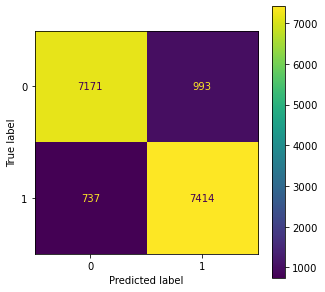

ROC AUC=0.961

Time Taken :4.573396921157837 seconds

 SMOTETomek Data
 0.9066405756848883
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7931
           1       0.89      0.93      0.91      7911

    accuracy                           0.91     15842
   macro avg       0.91      0.91      0.91     15842
weighted avg       0.91      0.91      0.91     15842

[[7028  903]
 [ 576 7335]]


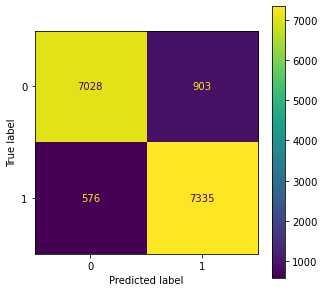

ROC AUC=0.969

Time Taken :4.3325536251068115 seconds


In [66]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

result(rf)

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_smk, y_smk, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.84 (+/- 0.00) [Logistic Regression]
Accuracy: 0.91 (+/- 0.03) [Random Forest]
Accuracy: 0.71 (+/- 0.01) [naive Bayes]
Accuracy: 0.87 (+/- 0.01) [Ensemble]


In [68]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [None, 80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 1000]
}

In [69]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [None, 80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [ 100, 200, 300, 400, 500]
}


# Create a based model
rf2 = RandomForestClassifier()
#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print("\nTime Taken :"+ str(end - start) +" seconds")


Fitting 3 folds for each of 900 candidates, totalling 2700 fits

Time Taken :3892.1297199726105 seconds


In [70]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [71]:
grid_search.best_score_

0.901518582254023

In [72]:
rf_ht = RandomForestClassifier(bootstrap = False,     
                               max_features ='sqrt',
                             max_depth= 110,
                            min_samples_leaf= 1,
                               min_samples_split= 5,
                               n_estimators = 400)
start = time.time()
rf_ht.fit(X_train, y_train)
pred = rf_ht.predict(X_test)

end = time.time()

In [73]:
print("\n Random Forest Hypertuned OverSampled Data\n",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

probs = rf_ht.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr,tpr)
print('ROC AUC=%.3f' % (roc_auc))
print("\nTime Taken :"+ str(end - start) +" seconds")


 Random Forest Hypertuned OverSampled Data
 0.9252221881703954
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8164
           1       0.90      0.96      0.93      8151

    accuracy                           0.93     16315
   macro avg       0.93      0.93      0.93     16315
weighted avg       0.93      0.93      0.93     16315

[[7292  872]
 [ 348 7803]]
ROC AUC=0.978

Time Taken :32.337886810302734 seconds
